In [1]:
from pynq import Overlay
from pynq import allocate
import struct
from pynq.overlays.base import BaseOverlay
import os
import cv2
import numpy as np
from IPython.display import display, Image, clear_output
from time import sleep
import time
import glob

In [2]:
class mobilefacenet:
    def __init__(self):
        self.I_conv1 = allocate(shape=(3, 112, 112), cacheable=False, dtype=np.float32)
        self.O_conv_1_conv = allocate(shape=(32,56,56), cacheable=False, dtype=np.float32)
        self.O_conv_1_bn = allocate(shape=(32,56,56), cacheable=False, dtype=np.float32)
        self.O_conv_1_prelu = allocate(shape=(32,56,56), cacheable=False, dtype=np.float32)

        self.O_conv_2_dw_conv = allocate(shape=(32,56,56), cacheable=False, dtype=np.float32)
        self.O_conv_2_dw_bn = allocate(shape=(32,56,56), cacheable=False, dtype=np.float32)
        self.O_conv_2_dw_prelu = allocate(shape=(32,56,56), cacheable=False, dtype=np.float32)

        self.O_conv_23_conv=allocate(shape=(64, 56, 56), cacheable=False, dtype=np.float32)
        self.O_conv_23_bn1=allocate(shape=(64, 56, 56), cacheable=False, dtype=np.float32)
        self.O_conv_23_prelu1=allocate(shape=(64, 56, 56), cacheable=False, dtype=np.float32)
        self.O_conv_23_conv_dw=allocate(shape=(64, 28, 28), cacheable=False, dtype=np.float32)
        self.O_conv_23_bn2=allocate(shape=(64, 28, 28), cacheable=False, dtype=np.float32)
        self.O_conv_23_prelu2=allocate(shape=(64, 28, 28), cacheable=False, dtype=np.float32)
        self.O_conv_23_project=allocate(shape=(32, 28, 28), cacheable=False, dtype=np.float32)
        self.O_conv_23_bn3=allocate(shape=(32, 28, 28), cacheable=False, dtype=np.float32)

        self.O_conv_3_conv1 = allocate(shape=(64, 28, 28), cacheable=False, dtype=np.float32)
        self.O_conv_3_bn1 = allocate(shape=(64, 28, 28), cacheable=False, dtype=np.float32)
        self.O_conv_3_prelu1 = allocate(shape=(64, 28, 28), cacheable=False, dtype=np.float32)
        self.O_conv_3_conv_dw = allocate(shape=(64, 28, 28), cacheable=False, dtype=np.float32)
        self.O_conv_3_bn2 = allocate(shape=(64, 28, 28), cacheable=False, dtype=np.float32)
        self.O_conv_3_prelu2 = allocate(shape=(64, 28, 28), cacheable=False, dtype=np.float32)
        self.O_conv_3_project = allocate(shape=(32, 28, 28), cacheable=False, dtype=np.float32)
        self.O_conv_3_bn3 = allocate(shape=(32, 28, 28), cacheable=False, dtype=np.float32)
        self.O_conv_3_add_0 = allocate(shape=(32, 28, 28), cacheable=False, dtype=np.float32)
        self.O_conv_3_add_1 = allocate(shape=(32, 28, 28), cacheable=False, dtype=np.float32)

        self.O_conv_34_conv1 = allocate(shape=(128,28,28), cacheable=False, dtype=np.float32)
        self.O_conv_34_bn1 = allocate(shape=(128,28,28), cacheable=False, dtype=np.float32)
        self.O_conv_34_prelu1 = allocate(shape=(128,28,28), cacheable=False, dtype=np.float32)
        self.O_conv_34_conv_dw = allocate(shape=(128,14,14), cacheable=False, dtype=np.float32)
        self.O_conv_34_bn2 = allocate(shape=(128,14,14), cacheable=False, dtype=np.float32)
        self.O_conv_34_prelu2 = allocate(shape=(128,14,14), cacheable=False, dtype=np.float32)
        self.O_conv_34_project = allocate(shape=(64,14,14), cacheable=False, dtype=np.float32)
        self.O_conv_34_bn3 = allocate(shape=(64,14,14), cacheable=False, dtype=np.float32)

        self.O_conv_4_conv1 = allocate(shape=(128,14,14), cacheable=False, dtype=np.float32)
        self.O_conv_4_bn1 = allocate(shape=(128,14,14), cacheable=False, dtype=np.float32)
        self.O_conv_4_prelu1 = allocate(shape=(128,14,14), cacheable=False, dtype=np.float32)
        self.O_conv_4_conv_dw = allocate(shape=(128,14,14), cacheable=False, dtype=np.float32)
        self.O_conv_4_bn2 = allocate(shape=(128,14,14), cacheable=False, dtype=np.float32)
        self.O_conv_4_prelu2 = allocate(shape=(128,14,14), cacheable=False, dtype=np.float32)
        self.O_conv_4_project = allocate(shape=(64,14,14), cacheable=False, dtype=np.float32)
        self.O_conv_4_bn3 = allocate(shape=(64,14,14), cacheable=False, dtype=np.float32)
        self.O_conv_4_add_0 = allocate(shape=(64,14,14), cacheable=False, dtype=np.float32)
        self.O_conv_4_add_1 = allocate(shape=(64,14,14), cacheable=False, dtype=np.float32)

        self.O_conv_45_conv1=allocate(shape=(256,14,14), cacheable=False, dtype=np.float32)
        self.O_conv_45_bn1=allocate(shape=(256,14,14), cacheable=False, dtype=np.float32)
        self.O_conv_45_prelu1=allocate(shape=(256,14,14), cacheable=False, dtype=np.float32)
        self.O_conv_45_conv_dw=allocate(shape=(256,7,7), cacheable=False, dtype=np.float32)
        self.O_conv_45_bn2=allocate(shape=(256,7,7), cacheable=False, dtype=np.float32)
        self.O_conv_45_prelu2=allocate(shape=(256,7,7), cacheable=False, dtype=np.float32)
        self.O_conv_45_project=allocate(shape=(64,7,7), cacheable=False, dtype=np.float32)
        self.O_conv_45_bn3=allocate(shape=(64,7,7), cacheable=False, dtype=np.float32)

        self.O_conv_5_conv1=allocate(shape=(128, 7, 7), cacheable=False, dtype=np.float32)
        self.O_conv_5_bn1=allocate(shape=(128, 7, 7), cacheable=False, dtype=np.float32)
        self.O_conv_5_prelu1=allocate(shape=(128, 7, 7), cacheable=False, dtype=np.float32)
        self.O_conv_5_conv_dw=allocate(shape=(128, 7, 7), cacheable=False, dtype=np.float32)
        self.O_conv_5_bn2=allocate(shape=(128, 7, 7), cacheable=False, dtype=np.float32)
        self.O_conv_5_prelu2=allocate(shape=(128, 7, 7), cacheable=False, dtype=np.float32)
        self.O_conv_5_project=allocate(shape=(64, 7, 7), cacheable=False, dtype=np.float32)
        self.O_conv_5_bn3=allocate(shape=(64, 7, 7), cacheable=False, dtype=np.float32)
        self.O_conv_5_add_0 = allocate(shape=(64, 7, 7), cacheable=False, dtype=np.float32)
        self.O_conv_5_add_1 = allocate(shape=(64, 7, 7), cacheable=False, dtype=np.float32)

        self.O_conv_6_sep_conv=allocate(shape=(128,7,7), cacheable=False, dtype=np.float32)
        self.O_conv_6_sep_bn=allocate(shape=(128,7,7), cacheable=False, dtype=np.float32)
        self.O_conv_6_sep_prelu=allocate(shape=(128,7,7), cacheable=False, dtype=np.float32)

        self.O_conv_6_dw_conv=allocate(shape=(128, 1, 1), cacheable=False, dtype=np.float32)
        self.O_conv_6_dw_bn=allocate(shape=(128, 1, 1), cacheable=False, dtype=np.float32)

        self.O_flatten=allocate(shape=(128), cacheable=False, dtype=np.float32)
        self.O_Linear_linear=allocate(shape=(128), cacheable=False, dtype=np.float32)
        self.O_BatchNorm1d_bn=allocate(shape=(128), cacheable=False, dtype=np.float32)
        #weight
        #conv1
        self.W_conv1_conv2d = allocate(shape=(32, 3, 3, 3), cacheable=False, dtype=np.float32)
        self.W_conv1_bn2d = allocate(shape=(32), cacheable=False, dtype=np.float32)
        self.B_conv1_bn2d = allocate(shape=(32), cacheable=False, dtype=np.float32)
        self.W_conv1_prelu = allocate(shape=(32), cacheable=False, dtype=np.float32)
        #conv2_dw
        self.W_conv2_dw_conv = allocate(shape=(32, 1, 3, 3), cacheable=False, dtype=np.float32)
        self.W_conv2_dw_bn = allocate(shape=(32), cacheable=False, dtype=np.float32)
        self.B_conv2_dw_bn = allocate(shape=(32), cacheable=False, dtype=np.float32)
        self.W_conv2_dw_prelu = allocate(shape=(32), cacheable=False, dtype=np.float32)
        #conv23
        self.W_conv_23_conv = allocate(shape=(64, 32, 1, 1), cacheable=False, dtype=np.float32)
        self.W_conv_23_bn1 = allocate(shape=(64), cacheable=False, dtype=np.float32)
        self.B_conv_23_bn1 = allocate(shape=(64), cacheable=False, dtype=np.float32)
        self.W_conv_23_prelu1 = allocate(shape=(64), cacheable=False, dtype=np.float32)
        self.W_conv_23_conv_dw = allocate(shape=(64, 1, 3, 3), cacheable=False, dtype=np.float32)
        self.W_conv_23_bn2 = allocate(shape=(64), cacheable=False, dtype=np.float32)
        self.B_conv_23_bn2 = allocate(shape=(64), cacheable=False, dtype=np.float32)
        self.W_conv_23_prelu2 = allocate(shape=(64), cacheable=False, dtype=np.float32)
        self.W_conv_23_project = allocate(shape=(32, 64, 1, 1), cacheable=False, dtype=np.float32)
        self.W_conv_23_bn3 = allocate(shape=(32), cacheable=False, dtype=np.float32)
        self.B_conv_23_bn3 = allocate(shape=(32), cacheable=False, dtype=np.float32)
        #conv3
        self.W_conv3_conv1_0 = allocate(shape=(64, 32, 1, 1), cacheable=False, dtype=np.float32)
        self.W_conv3_bn1_0 = allocate(shape=(64), cacheable=False, dtype=np.float32)
        self.B_conv3_bn1_0 = allocate(shape=(64), cacheable=False, dtype=np.float32)
        self.W_conv3_prelu1_0 = allocate(shape=(64), cacheable=False, dtype=np.float32)
        self.W_conv3_conv_dw_0 = allocate(shape=(64, 1, 3, 3), cacheable=False, dtype=np.float32)
        self.W_conv3_bn2_0 = allocate(shape=(64), cacheable=False, dtype=np.float32)
        self.B_conv3_bn2_0 = allocate(shape=(64), cacheable=False, dtype=np.float32)
        self.W_conv3_prelu2_0 = allocate(shape=(64), cacheable=False, dtype=np.float32)
        self.W_conv3_project_0 = allocate(shape=(32, 64, 1, 1), cacheable=False, dtype=np.float32)
        self.W_conv3_bn3_0 = allocate(shape=(32), cacheable=False, dtype=np.float32)
        self.B_conv3_bn3_0 = allocate(shape=(32), cacheable=False, dtype=np.float32)
        self.W_conv3_conv1_1 = allocate(shape=(64, 32, 1, 1), cacheable=False, dtype=np.float32)
        self.W_conv3_bn1_1 = allocate(shape=(64), cacheable=False, dtype=np.float32)
        self.B_conv3_bn1_1 = allocate(shape=(64), cacheable=False, dtype=np.float32)
        self.W_conv3_prelu1_1 = allocate(shape=(64), cacheable=False, dtype=np.float32)
        self.W_conv3_conv_dw_1 = allocate(shape=(64, 1, 3, 3), cacheable=False, dtype=np.float32)
        self.W_conv3_bn2_1 = allocate(shape=(64), cacheable=False, dtype=np.float32)
        self.B_conv3_bn2_1 = allocate(shape=(64), cacheable=False, dtype=np.float32)
        self.W_conv3_prelu2_1 = allocate(shape=(64), cacheable=False, dtype=np.float32)
        self.W_conv3_project_1 = allocate(shape=(32, 64, 1, 1), cacheable=False, dtype=np.float32)
        self.W_conv3_bn3_1 = allocate(shape=(32), cacheable=False, dtype=np.float32)
        self.B_conv3_bn3_1 = allocate(shape=(32), cacheable=False, dtype=np.float32)
        #conv34
        self.W_conv34_conv_conv = allocate(shape=(128, 32, 1, 1), cacheable=False, dtype=np.float32)
        self.W_conv34_conv_bn = allocate(shape=(128), cacheable=False, dtype=np.float32)
        self.B_conv34_conv_bn = allocate(shape=(128), cacheable=False, dtype=np.float32)
        self.W_conv34_conv_prelu = allocate(shape=(128), cacheable=False, dtype=np.float32)
        self.W_conv34_conv_dw_conv = allocate(shape=(128, 1, 3, 3), cacheable=False, dtype=np.float32)
        self.W_conv34_conv_dw_bn = allocate(shape=(128), cacheable=False, dtype=np.float32)
        self.B_conv34_conv_dw_bn = allocate(shape=(128), cacheable=False, dtype=np.float32)
        self.W_conv34_conv_dw_prelu = allocate(shape=(128), cacheable=False, dtype=np.float32)
        self.W_conv34_project_conv = allocate(shape=(64, 128, 1, 1), cacheable=False, dtype=np.float32)
        self.W_conv34_project_bn = allocate(shape=(64), cacheable=False, dtype=np.float32)
        self.B_conv34_project_bn = allocate(shape=(64), cacheable=False, dtype=np.float32)
        #conv4
        self.W_conv4_conv1_conv_0 = allocate(shape=(128, 64, 1, 1), cacheable=False, dtype=np.float32)
        self.W_conv4_bn1_0 = allocate(shape=(128), cacheable=False, dtype=np.float32)
        self.B_conv4_bn1_0 = allocate(shape=(128), cacheable=False, dtype=np.float32)
        self.W_conv4_prelu1_0 = allocate(shape=(128), cacheable=False, dtype=np.float32)
        self.W_conv4_conv_dw_0 = allocate(shape=(128, 1, 3, 3), cacheable=False, dtype=np.float32)
        self.W_conv4_bn2_0 = allocate(shape=(128), cacheable=False, dtype=np.float32)
        self.B_conv4_bn2_0 = allocate(shape=(128), cacheable=False, dtype=np.float32)
        self.W_conv4_prelu2_0 = allocate(shape=(128), cacheable=False, dtype=np.float32)
        self.W_conv4_project_0 = allocate(shape=(64, 128, 1, 1), cacheable=False, dtype=np.float32)
        self.W_conv4_bn3_0 = allocate(shape=(64), cacheable=False, dtype=np.float32)
        self.B_conv4_bn3_0 = allocate(shape=(64), cacheable=False, dtype=np.float32)

        self.W_conv4_conv1_conv_1 = allocate(shape=(128, 64, 1, 1), cacheable=False, dtype=np.float32)
        self.W_conv4_bn1_1 = allocate(shape=(128), cacheable=False, dtype=np.float32)
        self.B_conv4_bn1_1 = allocate(shape=(128), cacheable=False, dtype=np.float32)
        self.W_conv4_prelu1_1 = allocate(shape=(128), cacheable=False, dtype=np.float32)
        self.W_conv4_conv_dw_1 = allocate(shape=(128, 1, 3, 3), cacheable=False, dtype=np.float32)
        self.W_conv4_bn2_1 = allocate(shape=(128), cacheable=False, dtype=np.float32)
        self.B_conv4_bn2_1 = allocate(shape=(128), cacheable=False, dtype=np.float32)
        self.W_conv4_prelu2_1 = allocate(shape=(128), cacheable=False, dtype=np.float32)
        self.W_conv4_project_1 = allocate(shape=(64, 128, 1, 1), cacheable=False, dtype=np.float32)
        self.W_conv4_bn3_1 = allocate(shape=(64), cacheable=False, dtype=np.float32)
        self.B_conv4_bn3_1 = allocate(shape=(64), cacheable=False, dtype=np.float32)
        
        #conv45
        self.W_conv_45_conv1 = allocate(shape=(256, 64, 1, 1), cacheable=False, dtype=np.float32)
        self.W_conv_45_bn1 = allocate(shape=(256), cacheable=False, dtype=np.float32)
        self.B_conv_45_bn1 = allocate(shape=(256), cacheable=False, dtype=np.float32)
        self.W_conv_45_prelu1 = allocate(shape=(256), cacheable=False, dtype=np.float32)
        self.W_conv_45_conv_dw = allocate(shape=(256, 1, 3, 3), cacheable=False, dtype=np.float32)
        self.W_conv_45_bn2 = allocate(shape=(256), cacheable=False, dtype=np.float32)
        self.B_conv_45_bn2 = allocate(shape=(256), cacheable=False, dtype=np.float32)
        self.W_conv_45_prelu2 = allocate(shape=(256), cacheable=False, dtype=np.float32)
        self.W_conv_45_project = allocate(shape=(64, 256, 1, 1), cacheable=False, dtype=np.float32)
        self.W_conv_45_bn3 = allocate(shape=(64), cacheable=False, dtype=np.float32)
        self.B_conv_45_bn3 = allocate(shape=(64), cacheable=False, dtype=np.float32)
        #conv5
        self.W_conv5_conv1_0 = allocate(shape=(128, 64, 1, 1), cacheable=False, dtype=np.float32)
        self.W_conv5_bn1_0 = allocate(shape=(128), cacheable=False, dtype=np.float32)
        self.B_conv5_bn1_0 = allocate(shape=(128), cacheable=False, dtype=np.float32)
        self.W_conv5_prelu1_0 = allocate(shape=(128), cacheable=False, dtype=np.float32)
        self.W_conv5_conv_dw_0 = allocate(shape=(128, 1, 3, 3), cacheable=False, dtype=np.float32)
        self.W_conv5_bn2_0 = allocate(shape=(128), cacheable=False, dtype=np.float32)
        self.B_conv5_bn2_0 = allocate(shape=(128), cacheable=False, dtype=np.float32)
        self.W_conv5_prelu2_0 = allocate(shape=(128), cacheable=False, dtype=np.float32)
        self.W_conv5_project_0 = allocate(shape=(64, 128, 1, 1), cacheable=False, dtype=np.float32)
        self.W_conv5_bn3_0 = allocate(shape=(64), cacheable=False, dtype=np.float32)
        self.B_conv5_bn3_0 = allocate(shape=(64), cacheable=False, dtype=np.float32)
        
        self.W_conv5_conv1_1 = allocate(shape=(128, 64, 1, 1), cacheable=False, dtype=np.float32)
        self.W_conv5_bn1_1 = allocate(shape=(128), cacheable=False, dtype=np.float32)
        self.B_conv5_bn1_1 = allocate(shape=(128), cacheable=False, dtype=np.float32)
        self.W_conv5_prelu1_1 = allocate(shape=(128), cacheable=False, dtype=np.float32)
        self.W_conv5_conv_dw_1 = allocate(shape=(128, 1, 3, 3), cacheable=False, dtype=np.float32)
        self.W_conv5_bn2_1 = allocate(shape=(128), cacheable=False, dtype=np.float32)
        self.B_conv5_bn2_1 = allocate(shape=(128), cacheable=False, dtype=np.float32)
        self.W_conv5_prelu2_1 = allocate(shape=(128), cacheable=False, dtype=np.float32)
        self.W_conv5_project_1 = allocate(shape=(64, 128, 1, 1), cacheable=False, dtype=np.float32)
        self.W_conv5_bn3_1 = allocate(shape=(64), cacheable=False, dtype=np.float32)
        self.B_conv5_bn3_1 = allocate(shape=(64), cacheable=False, dtype=np.float32)

        #conv_6_sep
        self.W_conv6_sep_conv = allocate(shape=(128, 64, 1, 1), cacheable=False, dtype=np.float32)
        self.W_conv6_bn = allocate(shape=(128), cacheable=False, dtype=np.float32)
        self.B_conv6_bn = allocate(shape=(128), cacheable=False, dtype=np.float32)
        self.W_conv6_prelu = allocate(shape=(128), cacheable=False, dtype=np.float32)
        #conv_6_dw
        self.W_conv6_dw_conv = allocate(shape=(128, 1, 7, 7), cacheable=False, dtype=np.float32)
        self.W_conv6_dw_bn = allocate(shape=(128), cacheable=False, dtype=np.float32)
        self.B_conv6_dw_bn = allocate(shape=(128), cacheable=False, dtype=np.float32)
        #linear
        self.W_linear = allocate(shape=(128, 128), cacheable=False, dtype=np.float32)
        #batchNorm1d
        self.W_batchNorm1d_bn = allocate(shape=(128), cacheable=False, dtype=np.float32)
        self.B_batchNorm1d_bn = allocate(shape=(128), cacheable=False, dtype=np.float32)
        #conv1
        data = np.fromfile('./model_parameters_bin_128/conv1_conv_weight.bin', dtype=np.float32)
        if data.size == 32 * 3 * 3 * 3:
            self.W_conv1_conv2d[:] = data.reshape(32, 3, 3, 3)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv1_bn_bias.bin', dtype=np.float32)
        if data.size == 32:
            self.B_conv1_bn2d[:] = data.reshape(32)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv1_bn_weight.bin', dtype=np.float32)
        if data.size == 32:
            self.W_conv1_bn2d[:] = data.reshape(32)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv1_prelu_weight.bin', dtype=np.float32)
        if data.size == 32:
            self.W_conv1_prelu[:] = data.reshape(32)
        else:
            raise ValueError("檔案大小錯誤！")

        #conv2
        data = np.fromfile('./model_parameters_bin_128/conv2_dw_conv_weight.bin', dtype=np.float32)
        if data.size == 32 * 1 * 3 * 3:
            self.W_conv2_dw_conv[:] = data.reshape(32,1,3,3)  # 轉換維度符合分配的形狀
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv2_dw_bn_weight.bin', dtype=np.float32)
        if data.size == 32:
            self.W_conv2_dw_bn[:] = data.reshape(32)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv2_dw_bn_bias.bin', dtype=np.float32)
        if data.size == 32:
            self.B_conv2_dw_bn[:] = data.reshape(32)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv2_dw_prelu_weight.bin', dtype=np.float32)
        if data.size == 32:
            self.W_conv2_dw_prelu[:] = data.reshape(32)
        else:
            raise ValueError("檔案大小錯誤！")
        
        #conv23
        data = np.fromfile('./model_parameters_bin_128/conv_23_conv_conv_weight.bin', dtype=np.float32)
        if data.size == 64 * 32 * 1 * 1:
            self.W_conv_23_conv[:] = data.reshape(64, 32, 1, 1)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_23_conv_bn_weight.bin', dtype=np.float32)
        if data.size == 64:
            self.W_conv_23_bn1[:] = data.reshape(64)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_23_conv_bn_bias.bin', dtype=np.float32)
        if data.size == 64:
            self.B_conv_23_bn1[:] = data.reshape(64)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_23_conv_prelu_weight.bin', dtype=np.float32)
        if data.size == 64:
            self.W_conv_23_prelu1[:] = data.reshape(64)
        else:
            raise ValueError("檔案大小錯誤！")

        #conv_23.conv_dw
        data = np.fromfile('./model_parameters_bin_128/conv_23_conv_dw_conv_weight.bin', dtype=np.float32)
        if data.size == 64 * 1 * 3 * 3:
            self.W_conv_23_conv_dw[:] = data.reshape(64, 1, 3, 3)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_23_conv_dw_bn_weight.bin', dtype=np.float32)
        if data.size == 64:
            self.W_conv_23_bn2[:] = data.reshape(64)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_23_conv_dw_bn_bias.bin', dtype=np.float32)
        if data.size == 64:
            self.B_conv_23_bn2[:] = data.reshape(64)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_23_conv_dw_prelu_weight.bin', dtype=np.float32)
        if data.size == 64:
            self.W_conv_23_prelu2[:] = data.reshape(64)
        else:
            raise ValueError("檔案大小錯誤！")
        
        #conv_23.project
        data = np.fromfile('./model_parameters_bin_128/conv_23_project_conv_weight.bin', dtype=np.float32)
        if data.size == 32 * 64 * 1 * 1:
            self.W_conv_23_project[:] = data.reshape(32, 64, 1, 1)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_23_project_bn_weight.bin', dtype=np.float32)
        if data.size == 32:
            self.W_conv_23_bn3[:] = data.reshape(32)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_23_project_bn_bias.bin', dtype=np.float32)
        if data.size == 32:
            self.B_conv_23_bn3[:] = data.reshape(32)
        else:
            raise ValueError("檔案大小錯誤！")

        # conv3_model_0
        data = np.fromfile('./model_parameters_bin_128/conv_3_model_0_conv_conv_weight.bin', dtype=np.float32)
        if data.size == 64 * 32 * 1 * 1:
            self.W_conv3_conv1_0[:] = data.reshape(64, 32, 1, 1)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_3_model_0_conv_bn_weight.bin', dtype=np.float32)
        if data.size == 64:
            self.W_conv3_bn1_0[:] = data.reshape(64)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_3_model_0_conv_bn_bias.bin', dtype=np.float32)
        if data.size == 64:
            self.B_conv3_bn1_0[:] = data.reshape(64)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_3_model_0_conv_prelu_weight.bin', dtype=np.float32)
        if data.size == 64:
            self.W_conv3_prelu1_0[:] = data.reshape(64)
        else:
            raise ValueError("檔案大小錯誤！")

        #conv_3.model.0.conv_dw
        data = np.fromfile('./model_parameters_bin_128/conv_3_model_0_conv_dw_conv_weight.bin', dtype=np.float32)
        if data.size == 64 * 1 * 3 * 3:
            self.W_conv3_conv_dw_0[:] = data.reshape(64, 1, 3, 3)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_3_model_0_conv_dw_bn_weight.bin', dtype=np.float32)
        if data.size == 64:
            self.W_conv3_bn2_0[:] = data.reshape(64)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_3_model_0_conv_dw_bn_bias.bin', dtype=np.float32)
        if data.size == 64:
            self.B_conv3_bn2_0[:] = data.reshape(64)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_3_model_0_conv_dw_prelu_weight.bin', dtype=np.float32)
        if data.size == 64:
            self.W_conv3_prelu2_0[:] = data.reshape(64)
        else:
            raise ValueError("檔案大小錯誤！")

        #conv_3.model.0.project
        data = np.fromfile('./model_parameters_bin_128/conv_3_model_0_project_conv_weight.bin', dtype=np.float32)
        if data.size == 32 * 64 * 1 * 1:
            self.W_conv3_project_0[:] = data.reshape(32, 64, 1, 1)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_3_model_0_project_bn_weight.bin', dtype=np.float32)
        if data.size == 32:
            self.W_conv3_bn3_0[:] = data.reshape(32)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_3_model_0_project_bn_bias.bin', dtype=np.float32)
        if data.size == 32:
            self.B_conv3_bn3_0[:] = data.reshape(32)
        else:
            raise ValueError("檔案大小錯誤！")
            
        # conv3_model_1
        data = np.fromfile('./model_parameters_bin_128/conv_3_model_1_conv_conv_weight.bin', dtype=np.float32)
        if data.size == 64 * 32 * 1 * 1:
            self.W_conv3_conv1_1[:] = data.reshape(64, 32, 1, 1)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_3_model_1_conv_bn_weight.bin', dtype=np.float32)
        if data.size == 64:
            self.W_conv3_bn1_1[:] = data.reshape(64)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_3_model_1_conv_bn_bias.bin', dtype=np.float32)
        if data.size == 64:
            self.B_conv3_bn1_1[:] = data.reshape(64)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_3_model_1_conv_prelu_weight.bin', dtype=np.float32)
        if data.size == 64:
            self.W_conv3_prelu1_1[:] = data.reshape(64)
        else:
            raise ValueError("檔案大小錯誤！")

        #conv_3.model.1.conv_dw
        data = np.fromfile('./model_parameters_bin_128/conv_3_model_1_conv_dw_conv_weight.bin', dtype=np.float32)
        if data.size == 64 * 1 * 3 * 3:
            self.W_conv3_conv_dw_1[:] = data.reshape(64, 1, 3, 3)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_3_model_1_conv_dw_bn_weight.bin', dtype=np.float32)
        if data.size == 64:
            self.W_conv3_bn2_1[:] = data.reshape(64)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_3_model_1_conv_dw_bn_bias.bin', dtype=np.float32)
        if data.size == 64:
            self.B_conv3_bn2_1[:] = data.reshape(64)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_3_model_1_conv_dw_prelu_weight.bin', dtype=np.float32)
        if data.size == 64:
            self.W_conv3_prelu2_1[:] = data.reshape(64)
        else:
            raise ValueError("檔案大小錯誤！")

        #conv_3.model.1.project
        data = np.fromfile('./model_parameters_bin_128/conv_3_model_1_project_conv_weight.bin', dtype=np.float32)
        if data.size == 32 * 64 * 1 * 1:
            self.W_conv3_project_1[:] = data.reshape(32, 64, 1, 1)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_3_model_1_project_bn_weight.bin', dtype=np.float32)
        if data.size == 32:
            self.W_conv3_bn3_1[:] = data.reshape(32)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_3_model_1_project_bn_bias.bin', dtype=np.float32)
        if data.size == 32:
            self.B_conv3_bn3_1[:] = data.reshape(32)
        else:
            raise ValueError("檔案大小錯誤！")

        #conv34
        data = np.fromfile('./model_parameters_bin_128/conv_34_conv_conv_weight.bin', dtype=np.float32)
        if data.size == 128 * 32 * 1 * 1:
            self.W_conv34_conv_conv[:] = data.reshape(128, 32, 1, 1)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_34_conv_bn_weight.bin', dtype=np.float32)
        if data.size == 128:
            self.W_conv34_conv_bn[:] = data.reshape(128)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_34_conv_bn_bias.bin', dtype=np.float32)
        if data.size == 128:
            self.B_conv34_conv_bn[:] = data.reshape(128)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_34_conv_prelu_weight.bin', dtype=np.float32)
        if data.size == 128:
            self.W_conv34_conv_prelu[:] = data.reshape(128)
        else:
            raise ValueError("檔案大小錯誤！")

        #conv_34.conv_dw
        data = np.fromfile('./model_parameters_bin_128/conv_34_conv_dw_conv_weight.bin', dtype=np.float32)
        if data.size == 128 * 1 * 3 * 3:
            self.W_conv34_conv_dw_conv[:] = data.reshape(128, 1, 3, 3)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_34_conv_dw_bn_weight.bin', dtype=np.float32)
        if data.size == 128:
            self.W_conv34_conv_dw_bn[:] = data.reshape(128)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_34_conv_dw_bn_bias.bin', dtype=np.float32)
        if data.size == 128:
            self.B_conv34_conv_dw_bn[:] = data.reshape(128)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_34_conv_dw_prelu_weight.bin', dtype=np.float32)
        if data.size == 128:
            self.W_conv34_conv_dw_prelu[:] = data.reshape(128)
        else:
            raise ValueError("檔案大小錯誤！")

        #conv_34.project
        data = np.fromfile('./model_parameters_bin_128/conv_34_project_conv_weight.bin', dtype=np.float32)
        if data.size == 64 * 128 * 1 * 1:
            self.W_conv34_project_conv[:] = data.reshape(64, 128, 1, 1)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_34_project_bn_weight.bin', dtype=np.float32)
        if data.size == 64:
            self.W_conv34_project_bn[:] = data.reshape(64)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_34_project_bn_bias.bin', dtype=np.float32)
        if data.size == 64:
            self.B_conv34_project_bn[:] = data.reshape(64)
        else:
            raise ValueError("檔案大小錯誤！")
            
        # conv4_model0
        data = np.fromfile('./model_parameters_bin_128/conv_4_model_0_conv_conv_weight.bin', dtype=np.float32)
        if data.size == 128 * 64 * 1 * 1:
            self.W_conv4_conv1_conv_0[:] = data.reshape(128, 64, 1, 1)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_4_model_0_conv_bn_weight.bin', dtype=np.float32)
        if data.size == 128:
            self.W_conv4_bn1_0[:] = data.reshape(128)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_4_model_0_conv_bn_bias.bin', dtype=np.float32)
        if data.size == 128:
            self.B_conv4_bn1_0[:] = data.reshape(128)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_4_model_0_conv_prelu_weight.bin', dtype=np.float32)
        if data.size == 128:
            self.W_conv4_prelu1_0[:] = data.reshape(128)
        else:
            raise ValueError("檔案大小錯誤！")

        #conv_4.model.0.conv_dw
        data = np.fromfile('./model_parameters_bin_128/conv_4_model_0_conv_dw_conv_weight.bin', dtype=np.float32)
        if data.size == 128 * 1 * 3 * 3:
            self.W_conv4_conv_dw_0[:] = data.reshape(128,1,3,3)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_4_model_0_conv_dw_bn_weight.bin', dtype=np.float32)
        if data.size == 128:
            self.W_conv4_bn2_0[:] = data.reshape(128)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_4_model_0_conv_dw_bn_bias.bin', dtype=np.float32)
        if data.size == 128:
            self.B_conv4_bn2_0[:] = data.reshape(128)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_4_model_0_conv_dw_prelu_weight.bin', dtype=np.float32)
        if data.size == 128:
            self.W_conv4_prelu2_0[:] = data.reshape(128)
        else:
            raise ValueError("檔案大小錯誤！")

        #conv_4.model.0.project
        data = np.fromfile('./model_parameters_bin_128/conv_4_model_0_project_conv_weight.bin', dtype=np.float32)
        if data.size == 64 * 128 * 1 * 1:
            self.W_conv4_project_0[:] = data.reshape(64,128,1,1)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_4_model_0_project_bn_weight.bin', dtype=np.float32)
        if data.size == 64:
            self.W_conv4_bn3_0[:] = data.reshape(64)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_4_model_0_project_bn_bias.bin', dtype=np.float32)
        if data.size == 64:
            self.B_conv4_bn3_0[:] = data.reshape(64)
        else:
            raise ValueError("檔案大小錯誤！")

        # conv_4_model1
        data = np.fromfile('./model_parameters_bin_128/conv_4_model_1_conv_conv_weight.bin', dtype=np.float32)
        if data.size == 128 * 64 * 1 * 1:
            self.W_conv4_conv1_conv_1[:] = data.reshape(128, 64, 1, 1)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_4_model_1_conv_bn_weight.bin', dtype=np.float32)
        if data.size == 128:
            self.W_conv4_bn1_1[:] = data.reshape(128)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_4_model_1_conv_bn_bias.bin', dtype=np.float32)
        if data.size == 128:
            self.B_conv4_bn1_1[:] = data.reshape(128)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_4_model_1_conv_prelu_weight.bin', dtype=np.float32)
        if data.size == 128:
            self.W_conv4_prelu1_1[:] = data.reshape(128)
        else:
            raise ValueError("檔案大小錯誤！")

        #conv_4.model.1.conv_dw
        data = np.fromfile('./model_parameters_bin_128/conv_4_model_1_conv_dw_conv_weight.bin', dtype=np.float32)
        if data.size == 128 * 1 * 3 * 3:
            self.W_conv4_conv_dw_1[:] = data.reshape(128, 1, 3, 3)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_4_model_1_conv_dw_bn_weight.bin', dtype=np.float32)
        if data.size == 128:
            self.W_conv4_bn2_1[:] = data.reshape(128)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_4_model_1_conv_dw_bn_bias.bin', dtype=np.float32)
        if data.size == 128:
            self.B_conv4_bn2_1[:] = data.reshape(128)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_4_model_1_conv_dw_prelu_weight.bin', dtype=np.float32)
        if data.size == 128:
            self.W_conv4_prelu2_1[:] = data.reshape(128)
        else:
            raise ValueError("檔案大小錯誤！")

        #conv_4.model.1.project
        data = np.fromfile('./model_parameters_bin_128/conv_4_model_1_project_conv_weight.bin', dtype=np.float32)
        if data.size == 64 * 128 * 1 * 1:
            self.W_conv4_project_1[:] = data.reshape(64, 128, 1, 1)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_4_model_1_project_bn_weight.bin', dtype=np.float32)
        if data.size == 64:
            self.W_conv4_bn3_1[:] = data.reshape(64)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_4_model_1_project_bn_bias.bin', dtype=np.float32)
        if data.size == 64:
            self.B_conv4_bn3_1[:] = data.reshape(64)
        else:
            raise ValueError("檔案大小錯誤！")

        # conv45
        data = np.fromfile('./model_parameters_bin_128/conv_45_conv_conv_weight.bin', dtype=np.float32)
        if data.size == 256 * 64 * 1 * 1:
            self.W_conv_45_conv1[:] = data.reshape(256, 64, 1, 1)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_45_conv_bn_weight.bin', dtype=np.float32)
        if data.size == 256:
            self.W_conv_45_bn1[:] = data.reshape(256)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_45_conv_bn_bias.bin', dtype=np.float32)
        if data.size == 256:
            self.B_conv_45_bn1[:] = data.reshape(256)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_45_conv_prelu_weight.bin', dtype=np.float32)
        if data.size == 256:
            self.W_conv_45_prelu1[:] = data.reshape(256)
        else:
            raise ValueError("檔案大小錯誤！")

        #conv_45.conv_dw
        data = np.fromfile('./model_parameters_bin_128/conv_45_conv_dw_conv_weight.bin', dtype=np.float32)
        if data.size == 256 * 1 * 3 * 3:
            self.W_conv_45_conv_dw[:] = data.reshape(256, 1, 3, 3)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_45_conv_dw_bn_weight.bin', dtype=np.float32)
        if data.size ==256:
            self.W_conv_45_bn2[:] = data.reshape(256)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_45_conv_dw_bn_bias.bin', dtype=np.float32)
        if data.size == 256:
            self.B_conv_45_bn2[:] = data.reshape(256)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_45_conv_dw_prelu_weight.bin', dtype=np.float32)
        if data.size == 256:
            self.W_conv_45_prelu2[:] = data.reshape(256)
        else:
            raise ValueError("檔案大小錯誤！")

        #conv_45.project
        data = np.fromfile('./model_parameters_bin_128/conv_45_project_conv_weight.bin', dtype=np.float32)
        if data.size == 64 * 256 * 1 * 1:
            self.W_conv_45_project[:] = data.reshape(64, 256, 1, 1)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_45_project_bn_weight.bin', dtype=np.float32)
        if data.size == 64:
            self.W_conv_45_bn3[:] = data.reshape(64)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_45_project_bn_bias.bin', dtype=np.float32)
        if data.size == 64:
            self.B_conv_45_bn3[:] = data.reshape(64)
        else:
            raise ValueError("檔案大小錯誤！")

        # conv_5.model.0
        data = np.fromfile('./model_parameters_bin_128/conv_5_model_0_conv_conv_weight.bin', dtype=np.float32)
        if data.size == 128 * 64 * 1 * 1:
            self.W_conv5_conv1_0[:] = data.reshape(128, 64, 1, 1)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_5_model_0_conv_bn_weight.bin', dtype=np.float32)
        if data.size == 128:
            self.W_conv5_bn1_0[:] = data.reshape(128)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_5_model_0_conv_bn_bias.bin', dtype=np.float32)
        if data.size == 128:
            self.B_conv5_bn1_0[:] = data.reshape(128)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_5_model_0_conv_prelu_weight.bin', dtype=np.float32)
        if data.size == 128:
            self.W_conv5_prelu1_0[:] = data.reshape(128)
        else:
            raise ValueError("檔案大小錯誤！")

        #conv_5.model.0.conv_dw
        data = np.fromfile('./model_parameters_bin_128/conv_5_model_0_conv_dw_conv_weight.bin', dtype=np.float32)
        if data.size == 128 * 1 * 3 * 3:
            self.W_conv5_conv_dw_0[:] = data.reshape(128, 1, 3, 3)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_5_model_0_conv_dw_bn_weight.bin', dtype=np.float32)
        if data.size == 128:
            self.W_conv5_bn2_0[:] = data.reshape(128)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_5_model_0_conv_dw_bn_bias.bin', dtype=np.float32)
        if data.size == 128:
            self.B_conv5_bn2_0[:] = data.reshape(128)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_5_model_0_conv_dw_prelu_weight.bin', dtype=np.float32)
        if data.size == 128:
            self.W_conv5_prelu2_0[:] = data.reshape(128)
        else:
            raise ValueError("檔案大小錯誤！")

        #conv_5.model.0.project
        data = np.fromfile('./model_parameters_bin_128/conv_5_model_0_project_conv_weight.bin', dtype=np.float32)
        if data.size == 64 * 128 * 1 * 1:
            self.W_conv5_project_0[:] = data.reshape(64, 128, 1, 1)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_5_model_0_project_bn_weight.bin', dtype=np.float32)
        if data.size == 64:
            self.W_conv5_bn3_0[:] = data.reshape(64)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_5_model_0_project_bn_bias.bin', dtype=np.float32)
        if data.size == 64:
            self.B_conv5_bn3_0[:] = data.reshape(64)
        else:
            raise ValueError("檔案大小錯誤！")
        
       
        # conv_5.model.1
        data = np.fromfile('./model_parameters_bin_128/conv_5_model_1_conv_conv_weight.bin', dtype=np.float32)
        if data.size == 128 * 64 * 1 * 1:
            self.W_conv5_conv1_1[:] = data.reshape(128, 64, 1, 1)
        else:
            raise ValueError("檔案大小錯誤！")
        
        data = np.fromfile('./model_parameters_bin_128/conv_5_model_1_conv_bn_weight.bin', dtype=np.float32)
        if data.size == 128:
            self.W_conv5_bn1_1[:] = data.reshape(128)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_5_model_1_conv_bn_bias.bin', dtype=np.float32)
        if data.size == 128:
            self.B_conv5_bn1_1[:] = data.reshape(128)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_5_model_1_conv_prelu_weight.bin', dtype=np.float32)
        if data.size == 128:
            self.W_conv5_prelu1_1[:] = data.reshape(128)
        else:
            raise ValueError("檔案大小錯誤！")

        #conv_5.model.
        data = np.fromfile('./model_parameters_bin_128/conv_5_model_1_conv_dw_conv_weight.bin', dtype=np.float32)
        if data.size == 128 * 1 * 3 * 3:
            self.W_conv5_conv_dw_1[:] = data.reshape(128, 1, 3, 3)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_5_model_1_conv_dw_bn_weight.bin', dtype=np.float32)
        if data.size == 128:
            self.W_conv5_bn2_1[:] = data.reshape(128)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_5_model_1_conv_dw_bn_bias.bin', dtype=np.float32)
        if data.size == 128:
            self.B_conv5_bn2_1[:] = data.reshape(128)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_5_model_1_conv_dw_prelu_weight.bin', dtype=np.float32)
        if data.size == 128:
            self.W_conv5_prelu2_1[:] = data.reshape(128)
        else:
            raise ValueError("檔案大小錯誤！")

        #conv_5.model.1.project
        data = np.fromfile('./model_parameters_bin_128/conv_5_model_1_project_conv_weight.bin', dtype=np.float32)
        if data.size == 64 * 128 * 1 * 1:
            self.W_conv5_project_1[:] = data.reshape(64, 128, 1, 1)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_5_model_1_project_bn_weight.bin', dtype=np.float32)
        if data.size == 64:
            self.W_conv5_bn3_1[:] = data.reshape(64)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_5_model_1_project_bn_bias.bin', dtype=np.float32)
        if data.size == 64:
            self.B_conv5_bn3_1[:] = data.reshape(64)
        else:
            raise ValueError("檔案大小錯誤！")
        
        #conv_6_sep.
        data = np.fromfile('./model_parameters_bin_128/conv_6_sep_conv_weight.bin', dtype=np.float32)
        if data.size == 128 * 64 * 1 * 1:
            self.W_conv6_sep_conv[:] = data.reshape(128, 64, 1, 1)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_6_sep_bn_weight.bin', dtype=np.float32)
        if data.size == 128:
            self.W_conv6_bn[:] = data.reshape(128)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_6_sep_bn_bias.bin', dtype=np.float32)
        if data.size == 128:
            self.B_conv6_bn[:] = data.reshape(128)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_6_sep_prelu_weight.bin', dtype=np.float32)
        if data.size == 128:
            self.W_conv6_prelu[:] = data.reshape(128)
        else:
            raise ValueError("檔案大小錯誤！")
        #conv_6_dw
        data = np.fromfile('./model_parameters_bin_128/conv_6_dw_conv_weight.bin', dtype=np.float32)
        if data.size == 128 * 1 * 7 * 7:
            self.W_conv6_dw_conv[:] = data.reshape(128, 1, 7, 7)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_6_dw_bn_weight.bin', dtype=np.float32)
        if data.size == 128:
            self.W_conv6_dw_bn[:] = data.reshape(128)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/conv_6_dw_bn_bias.bin', dtype=np.float32)
        if data.size == 128:
            self.B_conv6_dw_bn[:] = data.reshape(128)
        else:
            raise ValueError("檔案大小錯誤！")
        # linear
        data = np.fromfile('./model_parameters_bin_128/linear_weight.bin', dtype=np.float32)
        if data.size == 128 * 128:
            self.W_linear[:] = data.reshape(128, 128)
        else:
            raise ValueError("檔案大小錯誤！")
        #bn
        data = np.fromfile('./model_parameters_bin_128/bn_weight.bin', dtype=np.float32)
        if data.size == 128:
            self.W_batchNorm1d_bn[:] = data.reshape(128)
        else:
            raise ValueError("檔案大小錯誤！")

        data = np.fromfile('./model_parameters_bin_128/bn_bias.bin', dtype=np.float32)
        if data.size == 128:
            self.B_batchNorm1d_bn[:] = data.reshape(128)
        else:
            raise ValueError("檔案大小錯誤！")
    def RunLinear(self, linear, in_size, out_size, feature_in, weight, feature_out):
        linear.write(0x10, in_size) #不確定
        linear.write(0x18, out_size) #不確定
        linear.write(0x20, feature_in.physical_address)
        linear.write(0x2c, weight.physical_address)
        linear.write(0x38, feature_out.physical_address)
        linear.write(0, (linear.read(0) & 0x80) | 0x01)
        tp = linear.read(0)
        while not ((tp >> 1) & 0x1):
            tp = linear.read(0)

    def RunBN1d(self, BN1d, in_size, feature_in, scale, bias, feature_out):
        BN1d.write(0x10, in_size); #不確定
        BN1d.write(0x18, feature_in.physical_address)
        BN1d.write(0x24, scale.physical_address)
        BN1d.write(0x30, bias.physical_address)
        BN1d.write(0x3c, feature_out.physical_address)
        BN1d.write(0, (BN1d.read(0) & 0x80) | 0x01)
        tp = BN1d.read(0)
        while not ((tp >> 1) & 0x1):
            tp = BN1d.read(0)
            
    def Runconv(self, conv, k, stride, padding, groups, feature_in, weight, feature_out):
        conv.write(0x10, feature_in.shape[0])
        conv.write(0x18, feature_out.shape[0])
        conv.write(0x20, feature_in.shape[1])
        conv.write(0x28, feature_in.shape[2])
        conv.write(0x30, k)
        conv.write(0x38, stride)
        conv.write(0x40, padding)
        conv.write(0x48, groups)
        conv.write(0x50, feature_in.physical_address)
        conv.write(0x5c, weight.physical_address)
        conv.write(0x68, feature_out.physical_address)
        data = (conv.read(0x00) & 0x80) | 0x01
        conv.write(0x00, data) 
        while not ((conv.read(0x00)>>1)&0x1):
            pass
        
    def RunPReLU(self,prelu, feature_in, alpha, feature_out):
        prelu.write(0x10, feature_in.shape[0])
        prelu.write(0x18, feature_in.shape[1])
        prelu.write(0x20, feature_in.shape[2])
        prelu.write(0x28, feature_in.physical_address)
        prelu.write(0x34, alpha.physical_address)
        prelu.write(0x40, feature_out.physical_address)
        prelu.write(0, (prelu.read(0) & 0x80) | 0x01)
        tp = prelu.read(0)
        while not ((tp >> 1) & 0x1):
            tp = prelu.read(0)
            
    def RunElement_wise_Add(self,EWA, input1, input2, output_r):
        EWA.write(0x10, output_r.shape[0]*output_r.shape[1]*output_r.shape[2])
        EWA.write(0x18, input1.physical_address)
        EWA.write(0x24, input2.physical_address)
        EWA.write(0x30, output_r.physical_address)
        EWA.write(0, (EWA.read(0) & 0x80) | 0x01)
        tp = EWA.read(0)
        while not ((tp >> 1) & 0x1):
            tp = EWA.read(0)
        
    def RunBN2d(self,xbn2,feature_in,scale,bias,feature_out):
        xbn2.write(0x10,feature_in.shape[0])
        xbn2.write(0x18,feature_in.shape[1])
        xbn2.write(0x20,feature_in.shape[2])
        xbn2.write(0x28,feature_in.physical_address)
        xbn2.write(0x34,scale.physical_address)
        xbn2.write(0x40,bias.physical_address)
        xbn2.write(0x4c,feature_out.physical_address)
        xbn2.write(0,(xbn2.read(0)&0x80)|0x01)
        tp=xbn2.read(0)
        while not ((tp>>1)&0x1):
            tp=xbn2.read(0)
            
    def _free_allocated(self):
        for attr in dir(self):
            obj = getattr(self, attr)
            if hasattr(obj, "freebuffer"):
                try:
                    obj.freebuffer()
                except:
                    pass

    def forward(self, img):
        img = img.transpose((2, 0, 1))
        img = (img - 127.5) / 127.5
        self.I_conv1[:] = img
        # conv1
        self.Runconv(conv, k=3, stride=2, padding=1, groups=1, feature_in=self.I_conv1, weight=self.W_conv1_conv2d, feature_out=self.O_conv_1_conv)
        self.RunBN2d(bn2d, self.O_conv_1_conv, self.W_conv1_bn2d, self.B_conv1_bn2d, self.O_conv_1_bn)
        self.RunPReLU(prelu, self.O_conv_1_bn, self.W_conv1_prelu, self.O_conv_1_prelu)
        
        
        # conv2_dw
        self.Runconv(conv, k=3, stride=1, padding=1, groups=32, feature_in=self.O_conv_1_prelu, weight=self.W_conv2_dw_conv, feature_out=self.O_conv_2_dw_conv)
        self.RunBN2d(bn2d, self.O_conv_2_dw_conv, self.W_conv2_dw_bn, self.B_conv2_dw_bn, self.O_conv_2_dw_bn)
        self.RunPReLU(prelu, self.O_conv_2_dw_bn, self.W_conv2_dw_prelu, self.O_conv_2_dw_prelu)
        
        
        # conv23
        self.Runconv(conv, k=1, stride=1, padding=0, groups=1, feature_in=self.O_conv_2_dw_prelu, weight=self.W_conv_23_conv, feature_out=self.O_conv_23_conv)
        self.RunBN2d(bn2d, self.O_conv_23_conv, self.W_conv_23_bn1, self.B_conv_23_bn1, self.O_conv_23_bn1)
        self.RunPReLU(prelu, self.O_conv_23_bn1, self.W_conv_23_prelu1, self.O_conv_23_prelu1)

        self.Runconv(conv, k=3, stride=2, padding=1, groups=64, feature_in=self.O_conv_23_prelu1, weight=self.W_conv_23_conv_dw, feature_out=self.O_conv_23_conv_dw)
        self.RunBN2d(bn2d, self.O_conv_23_conv_dw, self.W_conv_23_bn2, self.B_conv_23_bn2, self.O_conv_23_bn2)
        self.RunPReLU(prelu, self.O_conv_23_bn2, self.W_conv_23_prelu2, self.O_conv_23_prelu2)

        self.Runconv(conv, k=1, stride=1, padding=0, groups=1, feature_in=self.O_conv_23_prelu2, weight=self.W_conv_23_project, feature_out=self.O_conv_23_project)
        self.RunBN2d(bn2d, self.O_conv_23_project, self.W_conv_23_bn3, self.B_conv_23_bn3, self.O_conv_23_bn3)
        
        
        # conv3_0
        self.Runconv(conv, k=1, stride=1, padding=0, groups=1, feature_in=self.O_conv_23_bn3, weight=self.W_conv3_conv1_0, feature_out=self.O_conv_3_conv1)
        self.RunBN2d(bn2d, self.O_conv_3_conv1, self.W_conv3_bn1_0, self.B_conv3_bn1_0, self.O_conv_3_bn1)
        self.RunPReLU(prelu, self.O_conv_3_bn1, self.W_conv3_prelu1_0, self.O_conv_3_prelu1)
        
        self.Runconv(conv, k=3, stride=1, padding=1, groups=64, feature_in=self.O_conv_3_prelu1, weight=self.W_conv3_conv_dw_0, feature_out=self.O_conv_3_conv_dw)
        self.RunBN2d(bn2d, self.O_conv_3_conv_dw, self.W_conv3_bn2_0, self.B_conv3_bn2_0, self.O_conv_3_bn2)
        self.RunPReLU(prelu, self.O_conv_3_bn2, self.W_conv3_prelu2_0, self.O_conv_3_prelu2)

        self.Runconv(conv, k=1, stride=1, padding=0, groups=1, feature_in=self.O_conv_3_prelu2, weight=self.W_conv3_project_0, feature_out=self.O_conv_3_project)

        self.RunBN2d(bn2d, self.O_conv_3_project, self.W_conv3_bn3_0, self.B_conv3_bn3_0, self.O_conv_3_bn3)
#         self.O_conv_3_add_0 = self.O_conv_23_bn3 + self.O_conv_3_bn3
        self.RunElement_wise_Add(EWA, self.O_conv_23_bn3, self.O_conv_3_bn3, self.O_conv_3_add_0)
        
        
        # conv3_1
        self.Runconv(conv, k=1, stride=1, padding=0, groups=1, feature_in=self.O_conv_3_add_0, weight=self.W_conv3_conv1_1, feature_out=self.O_conv_3_conv1)
        self.RunBN2d(bn2d, self.O_conv_3_conv1, self.W_conv3_bn1_1, self.B_conv3_bn1_1, self.O_conv_3_bn1)
        self.RunPReLU(prelu, self.O_conv_3_bn1, self.W_conv3_prelu1_1, self.O_conv_3_prelu1)
        
        self.Runconv(conv, k=3, stride=1, padding=1, groups=64, feature_in=self.O_conv_3_prelu1, weight=self.W_conv3_conv_dw_1, feature_out=self.O_conv_3_conv_dw)
        self.RunBN2d(bn2d, self.O_conv_3_conv_dw, self.W_conv3_bn2_1, self.B_conv3_bn2_1, self.O_conv_3_bn2)
        self.RunPReLU(prelu, self.O_conv_3_bn2, self.W_conv3_prelu2_1, self.O_conv_3_prelu2)

        self.Runconv(conv, k=1, stride=1, padding=0, groups=1, feature_in=self.O_conv_3_prelu2, weight=self.W_conv3_project_1, feature_out=self.O_conv_3_project)
        self.RunBN2d(bn2d, self.O_conv_3_project, self.W_conv3_bn3_1, self.B_conv3_bn3_1, self.O_conv_3_bn3)
#         selfO_conv_3_add_1 = self.O_conv_3_add_0 + self.O_conv_3_bn3
        self.RunElement_wise_Add(EWA, self.O_conv_3_add_0, self.O_conv_3_bn3, self.O_conv_3_add_1)
        
        # conv34
        self.Runconv(conv, k=1, stride=1, padding=0, groups=1, feature_in=self.O_conv_3_add_1, weight=self.W_conv34_conv_conv, feature_out=self.O_conv_34_conv1)
        self.RunBN2d(bn2d, self.O_conv_34_conv1, self.W_conv34_conv_bn, self.B_conv34_conv_bn, self.O_conv_34_bn1)
        self.RunPReLU(prelu, self.O_conv_34_bn1, self.W_conv34_conv_prelu, self.O_conv_34_prelu1)

        self.Runconv(conv, k=3, stride=2, padding=1, groups=128, feature_in=self.O_conv_34_prelu1, weight=self.W_conv34_conv_dw_conv, feature_out=self.O_conv_34_conv_dw)
        self.RunBN2d(bn2d, self.O_conv_34_conv_dw, self.W_conv34_conv_dw_bn, self.B_conv34_conv_dw_bn, self.O_conv_34_bn2)
        self.RunPReLU(prelu, self.O_conv_34_bn2, self.W_conv34_conv_dw_prelu, self.O_conv_34_prelu2)

        self.Runconv(conv, k=1, stride=1, padding=0, groups=1, feature_in=self.O_conv_34_prelu2, weight=self.W_conv34_project_conv, feature_out=self.O_conv_34_project)
        self.RunBN2d(bn2d, self.O_conv_34_project, self.W_conv34_project_bn, self.B_conv34_project_bn, self.O_conv_34_bn3)
        

        
        # conv4_0
        self.Runconv(conv, k=1, stride=1, padding=0, groups=1, feature_in=self.O_conv_34_bn3, weight=self.W_conv4_conv1_conv_0, feature_out=self.O_conv_4_conv1)
        self.RunBN2d(bn2d, self.O_conv_4_conv1, self.W_conv4_bn1_0, self.B_conv4_bn1_0, self.O_conv_4_bn1)
        self.RunPReLU(prelu, self.O_conv_4_bn1, self.W_conv4_prelu1_0, self.O_conv_4_prelu1)
        
        self.Runconv(conv, k=3, stride=1, padding=1, groups=128, feature_in=self.O_conv_4_prelu1, weight=self.W_conv4_conv_dw_0, feature_out=self.O_conv_4_conv_dw)
        self.RunBN2d(bn2d, self.O_conv_4_conv_dw, self.W_conv4_bn2_0, self.B_conv4_bn2_0, self.O_conv_4_bn2)
        self.RunPReLU(prelu, self.O_conv_4_bn2, self.W_conv4_prelu2_0, self.O_conv_4_prelu2)

        self.Runconv(conv, k=1, stride=1, padding=0, groups=1, feature_in=self.O_conv_4_prelu2, weight=self.W_conv4_project_0, feature_out=self.O_conv_4_project)
        self.RunBN2d(bn2d, self.O_conv_4_project, self.W_conv4_bn3_0, self.B_conv4_bn3_0, self.O_conv_4_bn3)
#         self.O_conv_4_add_0 = self.O_conv_34_bn3 + self.O_conv_4_bn3
        self.RunElement_wise_Add(EWA, self.O_conv_34_bn3, self.O_conv_4_bn3, self.O_conv_4_add_0)

        # conv4_1
        self.Runconv(conv, k=1, stride=1, padding=0, groups=1, feature_in=self.O_conv_4_add_0, weight=self.W_conv4_conv1_conv_1, feature_out=self.O_conv_4_conv1)
        self.RunBN2d(bn2d, self.O_conv_4_conv1, self.W_conv4_bn1_1, self.B_conv4_bn1_1, self.O_conv_4_bn1)
        self.RunPReLU(prelu, self.O_conv_4_bn1, self.W_conv4_prelu1_1, self.O_conv_4_prelu1)
        
        self.Runconv(conv, k=3, stride=1, padding=1, groups=128, feature_in=self.O_conv_4_prelu1, weight=self.W_conv4_conv_dw_1, feature_out=self.O_conv_4_conv_dw)
        self.RunBN2d(bn2d, self.O_conv_4_conv_dw, self.W_conv4_bn2_1, self.B_conv4_bn2_1, self.O_conv_4_bn2)
        self.RunPReLU(prelu, self.O_conv_4_bn2, self.W_conv4_prelu2_1, self.O_conv_4_prelu2)

        self.Runconv(conv, k=1, stride=1, padding=0, groups=1, feature_in=self.O_conv_4_prelu2, weight=self.W_conv4_project_1, feature_out=self.O_conv_4_project)
        self.RunBN2d(bn2d, self.O_conv_4_project, self.W_conv4_bn3_1, self.B_conv4_bn3_1, self.O_conv_4_bn3)
#         self.O_conv_4_add_1 = self.O_conv_4_add_0 + self.O_conv_4_bn3
        self.RunElement_wise_Add(EWA, self.O_conv_4_add_0, self.O_conv_4_bn3, self.O_conv_4_add_1)
        
        # conv45
        self.Runconv(conv, k=1, stride=1, padding=0, groups=1, feature_in=self.O_conv_4_add_1, weight=self.W_conv_45_conv1, feature_out=self.O_conv_45_conv1)
        self.RunBN2d(bn2d, self.O_conv_45_conv1, self.W_conv_45_bn1, self.B_conv_45_bn1, self.O_conv_45_bn1)
        self.RunPReLU(prelu, self.O_conv_45_bn1, self.W_conv_45_prelu1, self.O_conv_45_prelu1)

        self.Runconv(conv, k=3, stride=2, padding=1, groups=256, feature_in=self.O_conv_45_prelu1, weight=self.W_conv_45_conv_dw, feature_out=self.O_conv_45_conv_dw)
        self.RunBN2d(bn2d, self.O_conv_45_conv_dw, self.W_conv_45_bn2, self.B_conv_45_bn2, self.O_conv_45_bn2)
        self.RunPReLU(prelu, self.O_conv_45_bn2, self.W_conv_45_prelu2, self.O_conv_45_prelu2)

        self.Runconv(conv, k=1, stride=1, padding=0, groups=1, feature_in=self.O_conv_45_prelu2, weight=self.W_conv_45_project, feature_out=self.O_conv_45_project)
        self.RunBN2d(bn2d, self.O_conv_45_project, self.W_conv_45_bn3, self.B_conv_45_bn3, self.O_conv_45_bn3)
        
        
        # conv5_0
        self.Runconv(conv, k=1, stride=1, padding=0, groups=1, feature_in=self.O_conv_45_bn3, weight=self.W_conv5_conv1_0, feature_out=self.O_conv_5_conv1)
        self.RunBN2d(bn2d, self.O_conv_5_conv1, self.W_conv5_bn1_0, self.B_conv5_bn1_0, self.O_conv_5_bn1)
        self.RunPReLU(prelu, self.O_conv_5_bn1, self.W_conv5_prelu1_0, self.O_conv_5_prelu1)

        self.Runconv(conv, k=3, stride=1, padding=1, groups=128, feature_in=self.O_conv_5_prelu1, weight=self.W_conv5_conv_dw_0, feature_out=self.O_conv_5_conv_dw)
        self.RunBN2d(bn2d, self.O_conv_5_conv_dw, self.W_conv5_bn2_0, self.B_conv5_bn2_0, self.O_conv_5_bn2)
        self.RunPReLU(prelu, self.O_conv_5_bn2, self.W_conv5_prelu2_0, self.O_conv_5_prelu2)

        self.Runconv(conv, k=1, stride=1, padding=0, groups=1, feature_in=self.O_conv_5_prelu2, weight=self.W_conv5_project_0, feature_out=self.O_conv_5_project)
        self.RunBN2d(bn2d, self.O_conv_5_project, self.W_conv5_bn3_0, self.B_conv5_bn3_0, self.O_conv_5_bn3)
#         self.O_conv_5_add = self.O_conv_5_bn3 + self.O_conv_45_bn3
        self.RunElement_wise_Add(EWA, self.O_conv_45_bn3, self.O_conv_5_bn3, self.O_conv_5_add_0)

        # conv5_1
        self.Runconv(conv, k=1, stride=1, padding=0, groups=1, feature_in=self.O_conv_5_add_0, weight=self.W_conv5_conv1_1, feature_out=self.O_conv_5_conv1)
        self.RunBN2d(bn2d, self.O_conv_5_conv1, self.W_conv5_bn1_1, self.B_conv5_bn1_1, self.O_conv_5_bn1)
        self.RunPReLU(prelu, self.O_conv_5_bn1, self.W_conv5_prelu1_1, self.O_conv_5_prelu1)

        self.Runconv(conv, k=3, stride=1, padding=1, groups=128, feature_in=self.O_conv_5_prelu1, weight=self.W_conv5_conv_dw_1, feature_out=self.O_conv_5_conv_dw)
        self.RunBN2d(bn2d, self.O_conv_5_conv_dw, self.W_conv5_bn2_1, self.B_conv5_bn2_1, self.O_conv_5_bn2)
        self.RunPReLU(prelu, self.O_conv_5_bn2, self.W_conv5_prelu2_1, self.O_conv_5_prelu2)

        self.Runconv(conv, k=1, stride=1, padding=0, groups=1, feature_in=self.O_conv_5_prelu2, weight=self.W_conv5_project_1, feature_out=self.O_conv_5_project)
        self.RunBN2d(bn2d, self.O_conv_5_project, self.W_conv5_bn3_1, self.B_conv5_bn3_1, self.O_conv_5_bn3)
#         self.O_conv_5_add = self.O_conv_5_bn3 + self.O_conv_45_bn3
        self.RunElement_wise_Add(EWA, self.O_conv_5_add_0, self.O_conv_5_bn3, self.O_conv_5_add_1)
        
        # conv6_sep
        self.Runconv(conv, k=1, stride=1, padding=0, groups=1, feature_in=self.O_conv_5_add_1, weight=self.W_conv6_sep_conv, feature_out=self.O_conv_6_sep_conv)
        self.RunBN2d(bn2d, self.O_conv_6_sep_conv, self.W_conv6_bn, self.B_conv6_bn, self.O_conv_6_sep_bn)
        self.RunPReLU(prelu, self.O_conv_6_sep_bn, self.W_conv6_prelu, self.O_conv_6_sep_prelu)
        
        
        # conv6_dw
        self.Runconv(conv, k=7, stride=1, padding=0, groups=128, feature_in=self.O_conv_6_sep_prelu, weight=self.W_conv6_dw_conv, feature_out=self.O_conv_6_dw_conv)
        self.RunBN2d(bn2d, self.O_conv_6_dw_conv, self.W_conv6_dw_bn, self.B_conv6_dw_bn, self.O_conv_6_dw_bn)

        self.O_flatten[:] = self.O_conv_6_dw_bn.reshape(-1)
        self.RunLinear(linear, 128, 128, self.O_flatten, self.W_linear, self.O_Linear_linear)
        self.RunBN1d(bn1d, 128, self.O_Linear_linear, self.W_batchNorm1d_bn, self.B_batchNorm1d_bn, self.O_BatchNorm1d_bn)
        return self.O_BatchNorm1d_bn
    def __del__(self):
        self._free_allocated()

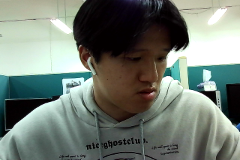

程式結束


In [3]:
while True:
    print("正在開啟攝像頭")
#     start_time = time.time()
    base = BaseOverlay("base.bit")
#     end_time = time.time()
#     print("base.bit_running time: ", end_time-start_time)
    endflag = False
    frame_in_w = 360
    frame_in_h = 240

    detector = cv2.CascadeClassifier('/home/xilinx/jupyter_notebooks/photo/haarcascade-frontalface-default.xml')

    videoIn = cv2.VideoCapture(0)
    videoIn.set(cv2.CAP_PROP_FRAME_WIDTH, frame_in_w)
    videoIn.set(cv2.CAP_PROP_FRAME_HEIGHT, frame_in_h)
    videoIn.set(cv2.CAP_PROP_BUFFERSIZE, 1)
    videoIn.set(cv2.CAP_PROP_FPS, 30)

    if not videoIn.isOpened():
        raise IOError("Cannot open webcam")

    print("Capture device is open: " + str(videoIn.isOpened()))

    count = 0
    last_face_img = None
    reg_flag = None

    while True:
        ret, frame = videoIn.read()
        if not ret:
            print("Failed to grab frame")
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = detector.detectMultiScale(gray)

        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # 顯示影像
        clear_output(wait=True)
        resized_frame = cv2.resize(frame, (240, 160))

        if last_face_img is not None:
            preview_face = cv2.resize(last_face_img, (240, 160))
            combined = np.vstack((resized_frame, preview_face))
        else:
            combined = resized_frame

        _, img_bytes = cv2.imencode('.png', combined)
        display(Image(data=img_bytes.tobytes()))

        # 拍照
        if base.buttons[0].read() == 1:
            if len(faces) > 0:
                (x, y, w, h) = faces[0]
                face_img = frame[y+2:y + h-2, x+2:x + w-2]
                face_img_resized = cv2.resize(face_img, (112, 112))
                last_face_img = face_img_resized
                print("已拍照，請確認下方圖片，按按鈕1註冊，按按鈕2開始辨識")
            else:
                print("未偵測到人臉")
            sleep(1)

        #註冊
        elif base.buttons[1].read() == 1:
            user_name = input("請輸入新使用者名稱：") 
            save_dir = f"faces_128/{user_name}"  
            os.makedirs(save_dir, exist_ok=True)
            existing_imgs = [f for f in os.listdir(save_dir) if f.endswith(".png")]
            count = len(existing_imgs)
            # 儲存
            if last_face_img is not None:
                img_path = f'{save_dir}/{count}.png'
                vec_path = f'{save_dir}/{user_name}_{count}_vec.txt'
                cv2.imwrite(f'{save_dir}/{count}.png', last_face_img)
                print(f"照片 {count} 已儲存")
                count += 1
                last_face_img = None
                reg_flag = 0
                break
            else:
                print("沒有照片可儲存")
            sleep(1)

        #辨識
        elif base.buttons[2].read() == 1:
            if last_face_img is not None:
                print(f"開始辨識...")
                reg_flag = 1
                break
            else:
                print("沒有拍攝成功")
            sleep(1)
        #end
        elif base.buttons[3].read() == 1:
            endflag = True
            break
    videoIn.release()
    cv2.destroyAllWindows()
    
    if endflag:
        break
#     start_time = time.time()
    ol=Overlay("./design_1.bit")
    ol.ip_dict
    ol.download()
    conv=ol.conv2d_0
    prelu=ol.prelu_0
    EWA=ol.elementwise_add_0
    bn1d=ol.batch_norm1d_0
    bn2d=ol.batch_norm2d_0
    linear=ol.linear_0
#     end_time = time.time()
#     print("design_1.bit_running time: ", end_time-start_time)
    
    MFN = mobilefacenet()
    if reg_flag == 0:
        image = cv2.imread(img_path).astype(np.float32)
        result = MFN.forward(img=image) 
        vec = np.array(result)
        with open(vec_path, "w") as f:
            for val in vec:
                f.write(str(val) + "\n")
#                 print(f"特徵向量已儲存為 {vec_path}")
    #辨識
    elif reg_flag == 1:
        start_time = time.time()
        result_rec = MFN.forward(img=last_face_img)
        vec_rec = np.array(result_rec)
        end_time = time.time()
        print("model running time:", end_time-start_time)
        # 取得所有 .txt 特徵檔案路徑
        feature_files = glob.glob('./faces_128/*/*.txt')
        for filepath in feature_files:
            with open(filepath, 'r') as f:
                vec = np.array([float(line.strip()) for line in f])
            cos_sim = vec.dot(vec_rec) / (np.linalg.norm(vec) * np.linalg.norm(vec_rec))
            if cos_sim >= 1:
                print("辨識成功！")
                print(f"{os.path.basename(filepath)} similarity: {cos_sim}")
                break
            # 顯示比對結果
            print(f"{os.path.basename(filepath)} similarity: {cos_sim}")
            print("辨識失敗><")
print("程式結束")